In [ ]:
import math 
from importnb import Notebook
import pandas as pd
import numpy as np
from pandasgui import show
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df=pd.read_csv('enhanced_parsed_shot_events.csv')    
df['goal']=df['result'].apply(lambda x: 1 if x=='goal' else 0 )

C:\Users\yahra\AppData\Local\Temp\ipykernel_16440\2461683269.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=df.groupby(['distance_bins','goal']).agg(total_shots=('shotType','count')).reset_index()


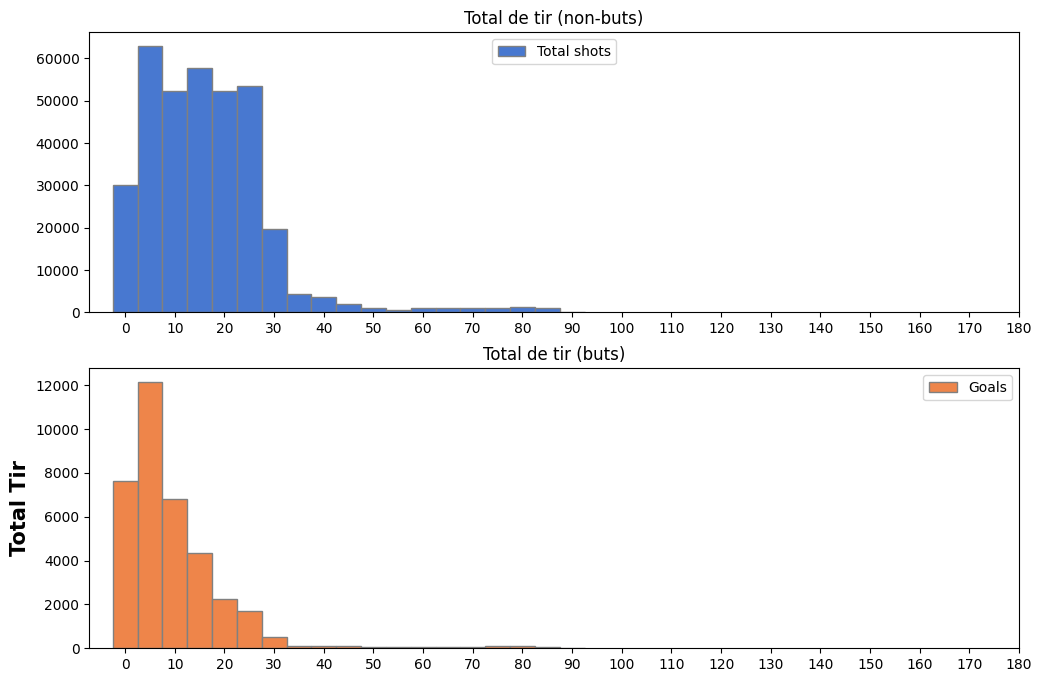

In [17]:
def shotdistance(df):
        bins=np.arange(0,200,10)
        df=df.copy()
        df['distance_bins'] = pd.cut(df['shotDistance'], bins=bins,include_lowest=True,right=True)
        df=df.groupby(['distance_bins','goal']).agg(total_shots=('shotType','count')).reset_index()
        df = df.sort_values('distance_bins')
        fig,ax = plt.subplots(2,figsize =(12, 8))
        # Position des bars sur l'axe X
        bar =  np.arange(len(df.index)//2)
        bar2 = [x  for x in bar]
        xticks=df[df['goal']==0].index
        label_distance=np.arange(0,190,10)
        colors = sns.color_palette("muted")
        #total shots
        ax[0].bar(bar, df[df['goal']==0]['total_shots'],color =colors[0], width = 1, 
                edgecolor ='grey', label ='Total shots') 
        ax[0].set_xticks(xticks, label_distance)
        ax[0].set_title("Total de tir (non-buts)")
    
        #goals
        ax[1].bar(bar2, df[df['goal']==1]['total_shots'],color =colors[1], width = 1, 
                edgecolor ='grey', label ='Goals')  
        ax[1].set_xticks(xticks, label_distance)
        ax[1].set_title("Total de tir (buts)")
        # Titre
       #Labels 
        #plt.xlabel('Distance du but', fontweight ='bold', fontsize = 15) 
        plt.ylabel('Total Tir', fontweight ='bold', fontsize = 15) 
        plt.xticks(xticks, label_distance)
        ax[0].legend(loc='upper center')
        ax[1].legend(loc='upper center')
        #plt.title('Taux de Buts en Fonction de la Distance au But',fontweight ='bold', fontsize = 15) 
        plt.legend()
        plt.show() 
        
shotdistance(df)    

C:\Users\yahra\AppData\Local\Temp\ipykernel_16440\1554204052.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['angle_bins', 'goal']).agg(total_shots=('shotType', 'count')).reset_index()


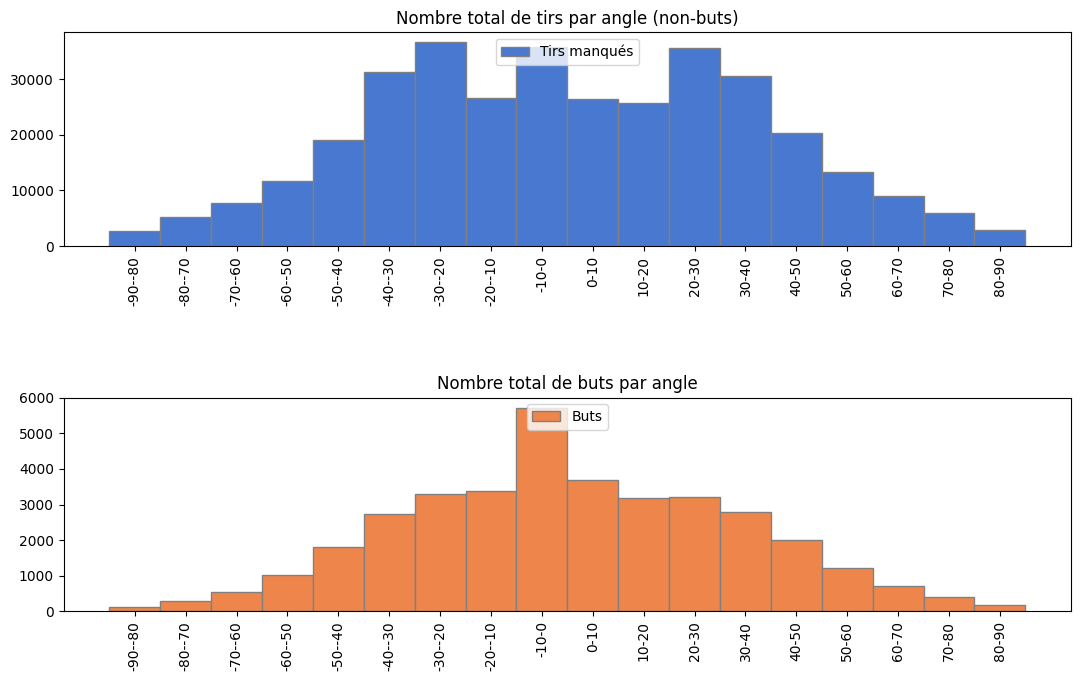

In [31]:
# Fonction pour afficher les histogrammes des tirs en fonction de l'angle
def shotangle(df):
    # Création des intervalles d'angle (bins)
    bins = np.arange(-90, 100, 10)  # Tranches de 10 degrés sur -90 à 90 degrés
    df = df.copy()

    # Binning de l'angle des tirs
    df['angle_bins'] = pd.cut(df['shotAngle'], bins=bins, include_lowest=True, right=True)

    # Agrégation des données par bins et par résultat (goal ou non)
    df = df.groupby(['angle_bins', 'goal']).agg(total_shots=('shotType', 'count')).reset_index()

    # Création des sous-graphes
    fig, ax = plt.subplots(2, figsize=(12, 8))

    # Position des barres sur l'axe X
    bar = np.arange(len(df.index) // 2)
    
    # Tri des bins d'angle
    df = df.sort_values('angle_bins')

    # Création des labels de ticks pour afficher des plages d'angle
    label_angle = [f"{int(interval.left)}-{int(interval.right)}" for interval in df['angle_bins'].unique()]

    colors = sns.color_palette("muted")

    # Graphique des tirs manqués (non-buts)
    ax[0].bar(bar, df[df['goal'] == 0]['total_shots'], color=colors[0], width=1, edgecolor='grey', label='Tirs manqués')
    ax[0].set_title("Nombre total de tirs par angle (non-buts)")
    ax[0].set_xticks(bar)
    ax[0].set_xticklabels(label_angle, rotation=90)

    # Graphique des buts
    ax[1].bar(bar, df[df['goal'] == 1]['total_shots'], color=colors[1], width=1, edgecolor='grey', label='Buts')
    ax[1].set_title("Nombre total de buts par angle")
    ax[1].set_xticks(bar)
    ax[1].set_xticklabels(label_angle, rotation=90)

    # Légendes
    ax[0].legend(loc='upper center')
    ax[1].legend(loc='upper center')
    fig.tight_layout(pad=5.0)
    # Affichage du graphique
    plt.show()

# Appel de la fonction shotangle
shotangle(df)

Text(0.5, 1.02, 'Distribution Conjointe des Tirs par Angle et Distance (2016-2019)')

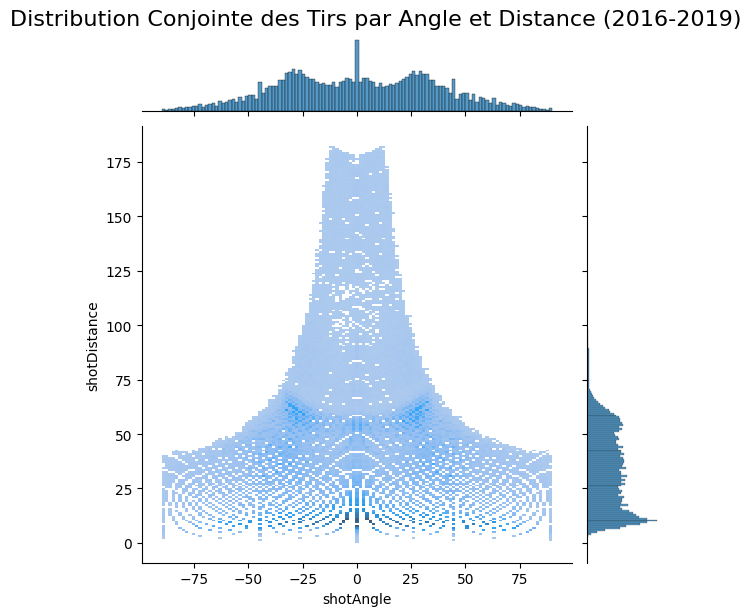

In [33]:
g = sns.jointplot(df, x='shotAngle', y='shotDistance', kind='hist')
g.fig.suptitle('Distribution Conjointe des Tirs par Angle et Distance (2016-2019)', 
               fontsize=16, y=1.02)

C:\Users\yahra\AppData\Local\Temp\ipykernel_16440\3029844460.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_ratio = df.groupby(['distance_bins'])['goal'].mean().reset_index()


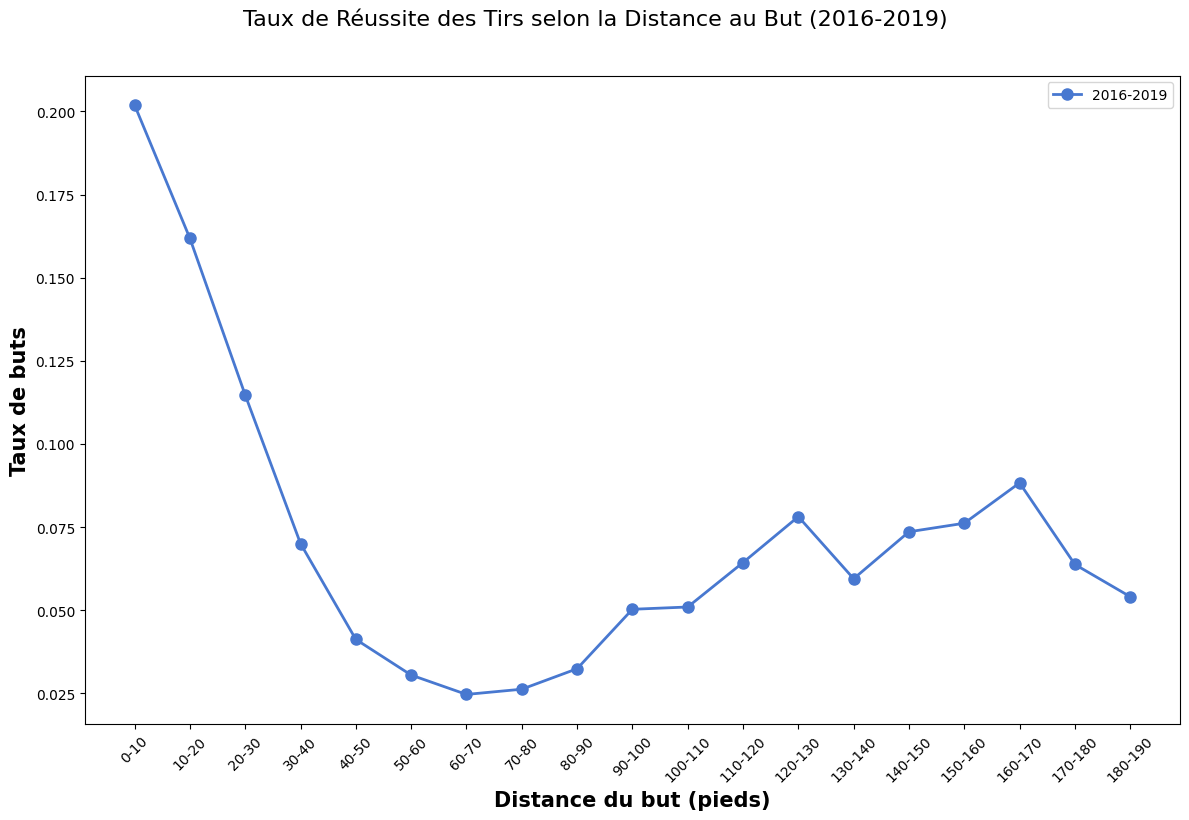

In [30]:
def ratiodistance(df):
    df = df.copy()
    
    # Création des intervalles de distance (bins)
    bins = np.arange(0, 200, 10)  # Tranches de 10 pieds jusqu'à 200 pieds
    df['distance_bins'] = pd.cut(df['shotDistance'], bins=bins, include_lowest=True, right=True)

    # Calcul du taux de but par bin
    goal_ratio = df.groupby(['distance_bins'])['goal'].mean().reset_index()

    # Création du graphe
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.suptitle('Taux de Réussite des Tirs selon la Distance au But (2016-2019)', 
                 fontsize=16, y=1.02)
    colors = sns.color_palette("muted")

    # Création des labels pour les intervalles
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    
    # Index X et tracé du taux de but
    x = range(len(goal_ratio))
    ax.plot(x, goal_ratio['goal'], color=colors[0], marker='o', linewidth=2, markersize=8, label='2016-2019')

    # Titres et étiquettes
    plt.xlabel('Distance du but (pieds)', fontweight='bold', fontsize=15)
    plt.ylabel('Taux de buts', fontweight='bold', fontsize=15)
    plt.xticks(x, labels, rotation=45)

    plt.legend()
    plt.tight_layout()
    plt.show()
# Appel de la fonction ratiodistance
ratiodistance(df)

In [ ]:
def ratioangle(df):   
    df=df.copy()
    bins=np.arange(-90,90,10)
    df['angle_bins'] = pd.cut(df['shotAngle'], bins=bins,include_lowest=True,right=True)
    goal_ratio = df.groupby(['angle_bins'])['goal'].mean().reset_index()
    fig,ax = plt.subplots(figsize =(12, 8)) 
    colors = sns.color_palette("muted")  
    #IL partage l'index X et les labels de distance
    xticks=np.arange(-90,80,10)
    print(xticks)
    label_distance=np.arange(-90,80,10)
    ax.plot(xticks,goal_ratio['goal'],color =colors[0], marker='o', linewidth=2, markersize=8, label='2018-2019') 

    # Titre
    ax.set_title('Taux de Buts en Fonction de l\'angle du tir au But par Saison (2018-2021)',fontweight ='bold', fontsize = 15) 
    #Labels 
    plt.xlabel('Angle du tir', fontweight ='bold', fontsize = 15) 
    plt.ylabel('Goal ratio', fontweight ='bold', fontsize = 15) 
    plt.xticks(xticks, label_distance )
    plt.legend()
    plt.show() 
ratioangle(df)

          season      gameId  eventId  period timeInPeriod     eventType  \
0       20162017  2016020001        8       1        01:11  shot-on-goal   
1       20162017  2016020001       11       1        02:53  shot-on-goal   
2       20162017  2016020001       15       1        04:01  shot-on-goal   
3       20162017  2016020001       16       1        04:46  shot-on-goal   
4       20162017  2016020001       24       1        06:46  shot-on-goal   
...          ...         ...      ...     ...          ...           ...   
385071  20202021  2020030415      692       3        16:19  shot-on-goal   
385072  20202021  2020030415      693       3        17:13  shot-on-goal   
385073  20202021  2020030415      697       3        19:01  shot-on-goal   
385074  20202021  2020030415      698       3        19:10  shot-on-goal   
385075  20202021  2020030415      699       3        19:24  shot-on-goal   

        teamId            shooter              goalie HomevsAway  ...  \
0           10

C:\Users\yahra\AppData\Local\Temp\ipykernel_16440\2016214714.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = goals_df.groupby(['distance_bins', 'emptyNetGoal']).agg(


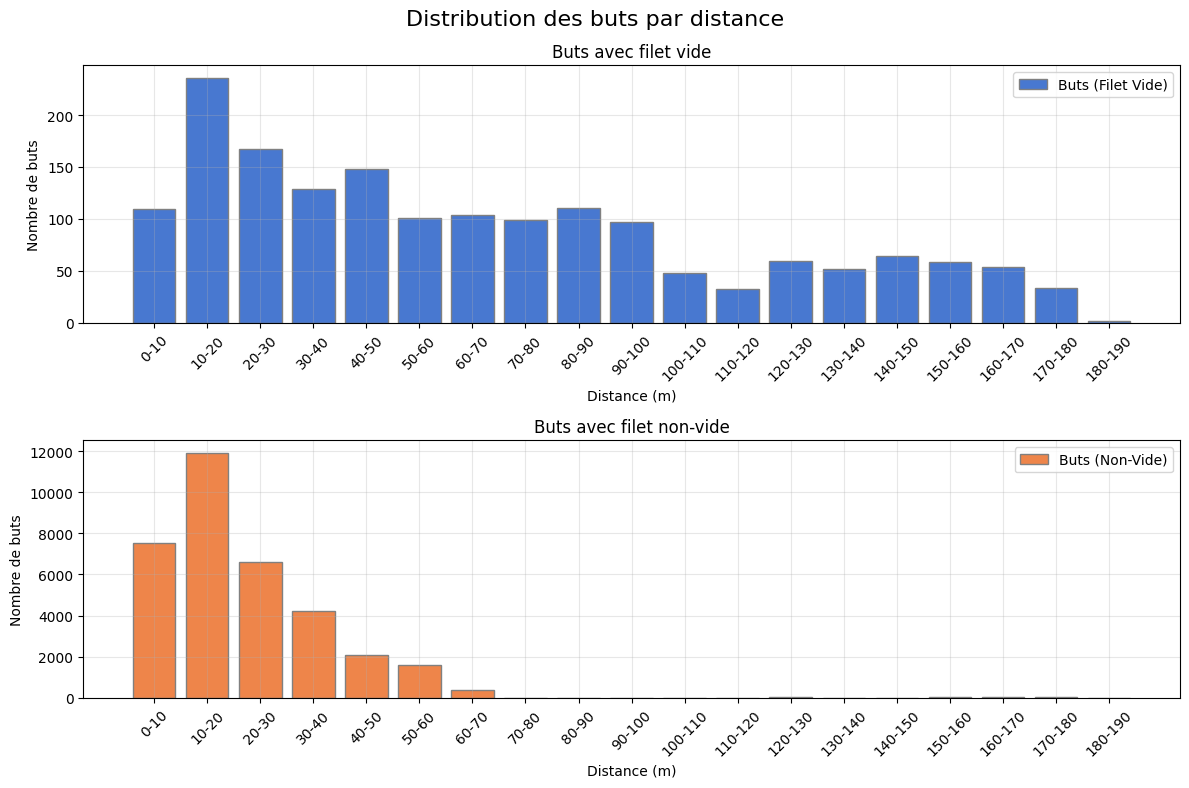

In [29]:
def shotdistance(df):
    print(df)
    # Étape 1: Filtrer d'abord pour les buts
    goals_df = df[df['goal'] == 1].copy()
    
    # Étape 2: Créer les bins de distance
    bins = np.arange(0, 200, 10)
    goals_df['distance_bins'] = pd.cut(goals_df['shotDistance'], bins=bins, include_lowest=True, right=True)
    
    # Étape 3: Grouper les données
    df_grouped = goals_df.groupby(['distance_bins', 'emptyNetGoal']).agg(
        total_goals=('shotType', 'count')
    ).reset_index()
    
    # Séparer les données pour filet vide et non-vide
    empty_net = df_grouped[df_grouped['emptyNetGoal'] == True].sort_values('distance_bins')
    non_empty_net = df_grouped[df_grouped['emptyNetGoal'] == False].sort_values('distance_bins')
    # Création du graphique
    fig, ax = plt.subplots(2, figsize=(12, 8))
    fig.suptitle('Distribution des buts par distance', fontsize=16)
    
    # Création de l'axe x
    x = range(len(empty_net))
    
    colors = sns.color_palette("muted")
    
    # Premier graphique (filet vide)
    ax[0].bar(x, empty_net['total_goals'], color=colors[0], width=0.8, 
              edgecolor='grey', label='Buts (Filet Vide)')
    ax[0].set_title("Buts avec filet vide")
    ax[0].grid(True, alpha=0.3)
    ax[0].set_xlabel('Distance (m)')
    ax[0].set_ylabel('Nombre de buts')
    
    # Création des labels
    labels = [f"{int(interval.left)}-{int(interval.right)}" 
             for interval in empty_net['distance_bins']]
    
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(labels, rotation=45)
    
    # Deuxième graphique (filet non-vide)
    ax[1].bar(x, non_empty_net['total_goals'], color=colors[1], width=0.8, 
              edgecolor='grey', label='Buts (Non-Vide)')
    ax[1].set_title("Buts avec filet non-vide")
    ax[1].grid(True, alpha=0.3)
    ax[1].set_xlabel('Distance (m)')
    ax[1].set_ylabel('Nombre de buts')
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(labels, rotation=45)
    
    # Ajout des légendes
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='upper right')
    
    plt.tight_layout()
    plt.show() 
shotdistance(df)

C:\Users\yahra\AppData\Local\Temp\ipykernel_16440\2984865784.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_ratio = df.groupby(['angle_bins'])['goal'].mean().reset_index()


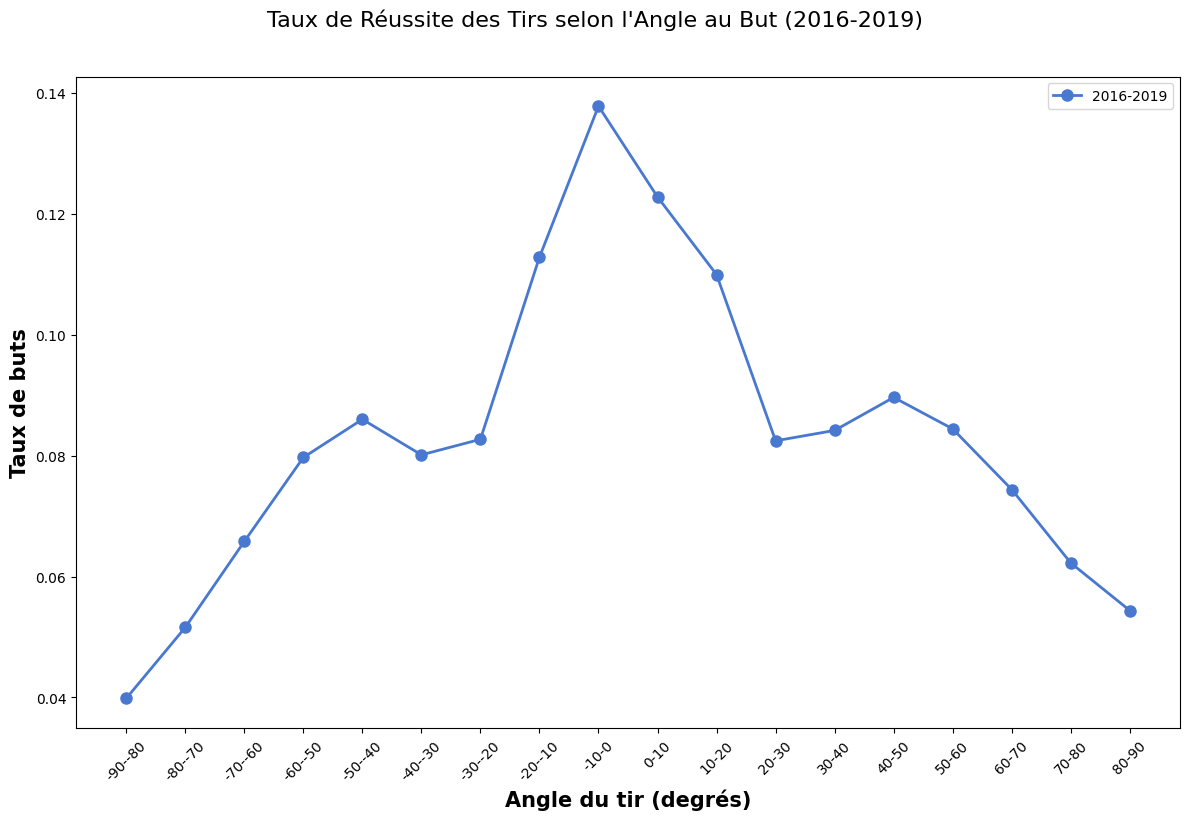

In [26]:
def ratioangle(df):
    df = df.copy()

    # Création des intervalles d'angle (bins)
    bins = np.arange(-90, 100, 10)  # Tranches de 10 degrés sur -90 à 90 degrés
    df['angle_bins'] = pd.cut(df['shotAngle'], bins=bins, include_lowest=True, right=True)

    # Calcul du taux de but par bin
    goal_ratio = df.groupby(['angle_bins'])['goal'].mean().reset_index()

    # Création du graphe
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.suptitle('Taux de Réussite des Tirs selon l\'Angle au But (2016-2019)', 
                 fontsize=16, y=1.02)
    colors = sns.color_palette("muted")

    # Création des labels pour les intervalles
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    
    # Index X et tracé du taux de but
    x = range(len(goal_ratio))
    ax.plot(x, goal_ratio['goal'], color=colors[0], marker='o', linewidth=2, markersize=8, label='2016-2019')

    # Titres et étiquettes
    plt.xlabel('Angle du tir (degrés)', fontweight='bold', fontsize=15)
    plt.ylabel('Taux de buts', fontweight='bold', fontsize=15)
    plt.xticks(x, labels, rotation=45)

    plt.legend()
    plt.tight_layout()
    plt.show()
ratioangle(df)

C:\Users\yahra\AppData\Local\Temp\ipykernel_16440\3029844460.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_ratio = df.groupby(['distance_bins'])['goal'].mean().reset_index()


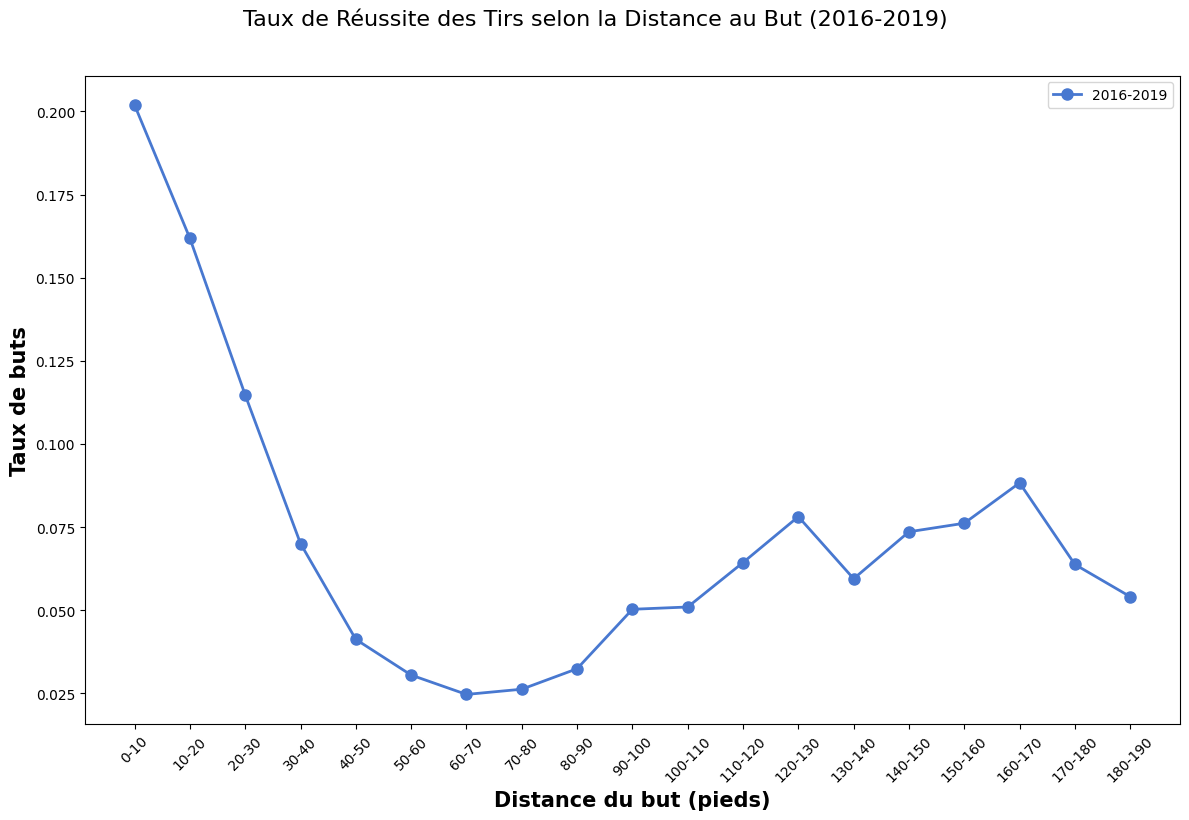

C:\Users\yahra\AppData\Local\Temp\ipykernel_16440\1554204052.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['angle_bins', 'goal']).agg(total_shots=('shotType', 'count')).reset_index()


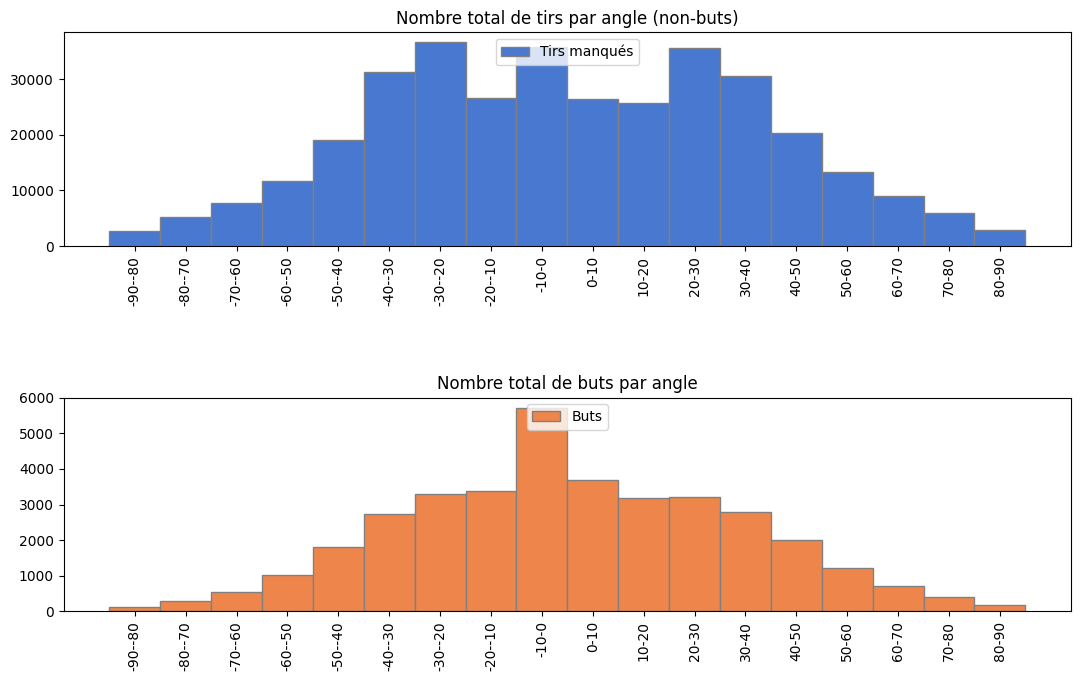